In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('loan_dataset_20000.csv')
df.head()

,age,gender,marital_status,education_level,annual_income,monthly_income,employment_status,debt_to_income_ratio,credit_score,loan_amount,...,loan_term,installment,grade_subgrade,num_of_open_accounts,total_credit_limit,current_balance,delinquency_history,public_records,num_of_delinquencies,loan_paid_back
0,59,Male,Married,Master's,24240.19,2020.02,Employed,0.074,743,17173.72,...,36,581.88,B5,7,40833.47,24302.07,1,0,1,1
1,72,Female,Married,Bachelor's,20172.98,1681.08,Employed,0.219,531,22663.89,...,60,573.17,F1,5,27968.01,10803.01,1,0,3,1
2,49,Female,Single,High School,26181.80,2181.82,Employed,0.234,779,3631.36,...,60,76.32,B4,2,15502.25,4505.44,0,0,0,1
3,35,Female,Single,High School,11873.84,989.49,Employed,0.264,809,14939.23,...,36,468.07,A5,7,18157.79,5525.63,4,0,5,1
4,63,Other,Single,Other,25326.44,2110.54,Employed,0.260,663,16551.71,...,60,395.50,D5,1,17467.56,3593.91,2,0,2,1


In [27]:
df.isnull().sum()

age                     0
gender                  0
marital_status          0
education_level         0
annual_income           0
monthly_income          0
employment_status       0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
loan_purpose            0
interest_rate           0
loan_term               0
installment             0
grade_subgrade          0
num_of_open_accounts    0
total_credit_limit      0
current_balance         0
delinquency_history     0
public_records          0
num_of_delinquencies    0
loan_paid_back          0
dtype: int64

In [28]:
df.dtypes

age                       int64
gender                   object
marital_status           object
education_level          object
annual_income           float64
monthly_income          float64
employment_status        object
debt_to_income_ratio    float64
credit_score              int64
loan_amount             float64
loan_purpose             object
interest_rate           float64
loan_term                 int64
installment             float64
grade_subgrade           object
num_of_open_accounts      int64
total_credit_limit      float64
current_balance         float64
delinquency_history       int64
public_records            int64
num_of_delinquencies      int64
loan_paid_back            int64
dtype: object

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   20000 non-null  int64  
 1   gender                20000 non-null  object 
 2   marital_status        20000 non-null  object 
 3   education_level       20000 non-null  object 
 4   annual_income         20000 non-null  float64
 5   monthly_income        20000 non-null  float64
 6   employment_status     20000 non-null  object 
 7   debt_to_income_ratio  20000 non-null  float64
 8   credit_score          20000 non-null  int64  
 9   loan_amount           20000 non-null  float64
 10  loan_purpose          20000 non-null  object 
 11  interest_rate         20000 non-null  float64
 12  loan_term             20000 non-null  int64  
 13  installment           20000 non-null  float64
 14  grade_subgrade        20000 non-null  object 
 15  num_of_open_account

In [30]:
df['loan_paid_back'].value_counts()

loan_paid_back
1    15998
0     4002
Name: count, dtype: int64

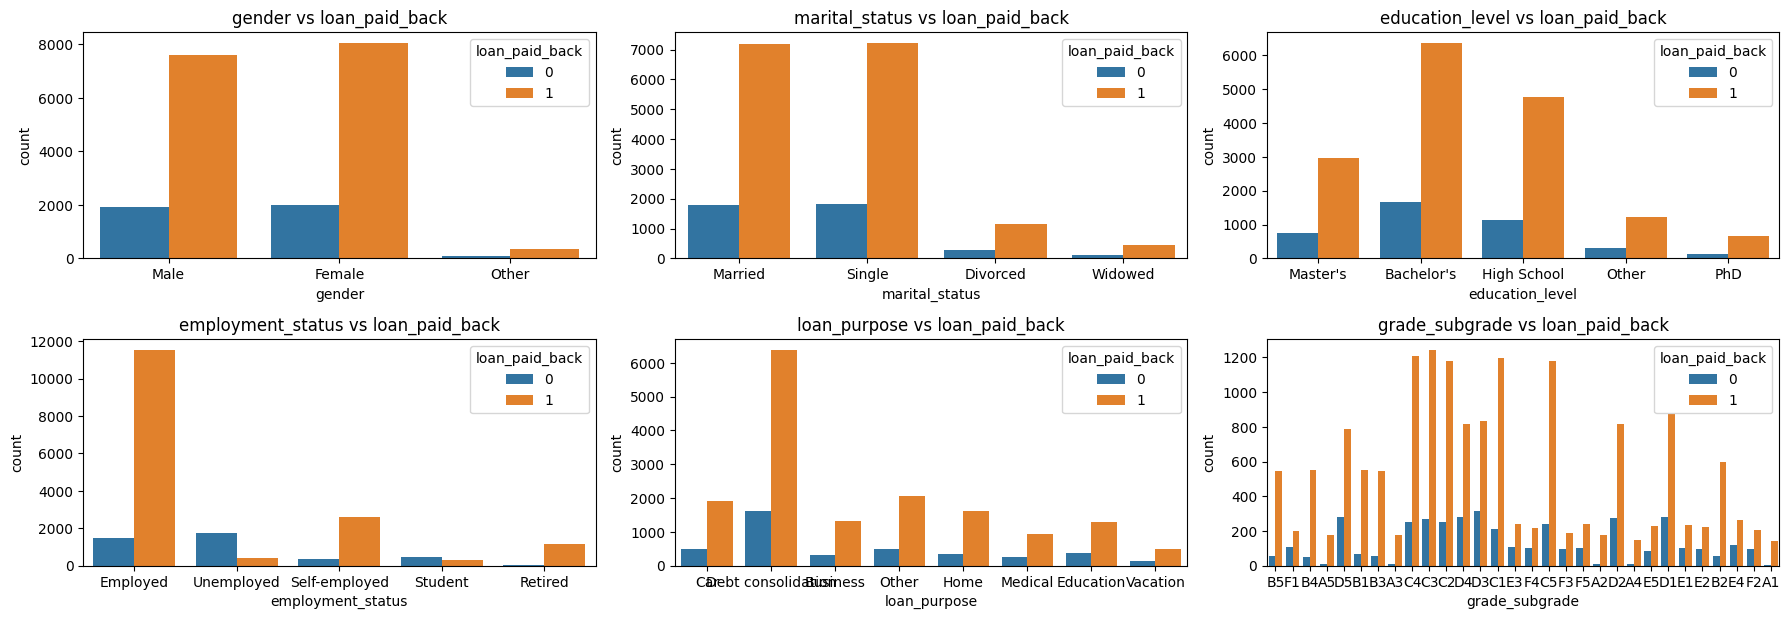

In [31]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

CAT_FEATS=["gender","marital_status","education_level","employment_status","loan_purpose","grade_subgrade"]


plt.figure(figsize=(18, len(CAT_FEATS) * 2))
for i, col in enumerate(CAT_FEATS):
    plt.subplot(len(CAT_FEATS) // 2 + 1, 3, i + 1)
    sns.countplot(x=col, hue='loan_paid_back', data=df)
    plt.title(f"{col} vs loan_paid_back")
    plt.tight_layout()

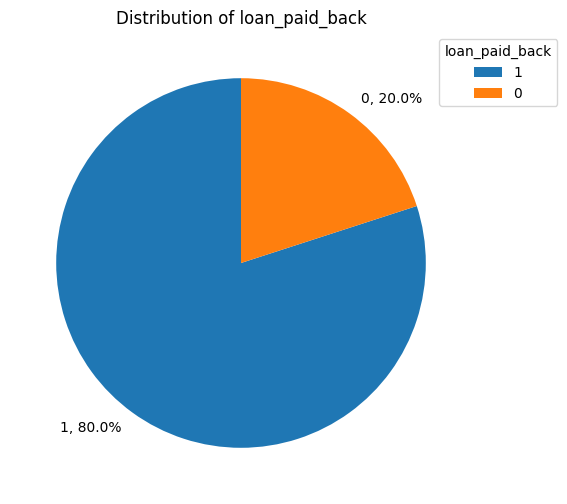

In [32]:
LABEL="loan_paid_back"
status_counts = df[LABEL].value_counts()
labels = status_counts.index
sizes = status_counts.values

# Calculating the percentage of each category
percentages = 100.*sizes/sizes.sum()

# Creating the pie chart with percentages in the labels
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=[f"{l}, {s:.1f}%" for l, s in zip(labels, percentages)], startangle=90)
plt.gca().set_aspect("equal")
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1), labels=labels, title=LABEL)
plt.title(f"Distribution of {LABEL}")
plt.show()

In [33]:
from sklearn.preprocessing import LabelEncoder

cat_cols = [
    'gender', 
    'marital_status', 
    'education_level', 
    'employment_status',
    'loan_purpose', 
    'grade_subgrade'
]

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [34]:
df.head()

,age,gender,marital_status,education_level,annual_income,monthly_income,employment_status,debt_to_income_ratio,credit_score,loan_amount,...,loan_term,installment,grade_subgrade,num_of_open_accounts,total_credit_limit,current_balance,delinquency_history,public_records,num_of_delinquencies,loan_paid_back
0,59,1,1,2,24240.19,2020.02,0,0.074,743,17173.72,...,36,581.88,9,7,40833.47,24302.07,1,0,1,1
1,72,0,1,0,20172.98,1681.08,0,0.219,531,22663.89,...,60,573.17,25,5,27968.01,10803.01,1,0,3,1
2,49,0,2,1,26181.80,2181.82,0,0.234,779,3631.36,...,60,76.32,8,2,15502.25,4505.44,0,0,0,1
3,35,0,2,1,11873.84,989.49,0,0.264,809,14939.23,...,36,468.07,4,7,18157.79,5525.63,4,0,5,1
4,63,2,2,3,25326.44,2110.54,0,0.260,663,16551.71,...,60,395.50,19,1,17467.56,3593.91,2,0,2,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   20000 non-null  int64  
 1   gender                20000 non-null  int64  
 2   marital_status        20000 non-null  int64  
 3   education_level       20000 non-null  int64  
 4   annual_income         20000 non-null  float64
 5   monthly_income        20000 non-null  float64
 6   employment_status     20000 non-null  int64  
 7   debt_to_income_ratio  20000 non-null  float64
 8   credit_score          20000 non-null  int64  
 9   loan_amount           20000 non-null  float64
 10  loan_purpose          20000 non-null  int64  
 11  interest_rate         20000 non-null  float64
 12  loan_term             20000 non-null  int64  
 13  installment           20000 non-null  float64
 14  grade_subgrade        20000 non-null  int64  
 15  num_of_open_account

In [36]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['loan_paid_back'])
y = df['loan_paid_back']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training feature set shape:", X_train.shape)
print("Testing feature set shape:", X_test.shape)


Training feature set shape: (16000, 21)
Testing feature set shape: (4000, 21)


In [37]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

rfc.score(X_test,y_test)

0.8975

In [38]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

model_params = {
    
    'xgboost': {
        'model': XGBClassifier(eval_metric='logloss'),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 5],
            'learning_rate': [0.01]
        }
    },

    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10]
        }
    },

    'lightgbm': {
        'model': LGBMClassifier(),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.1],
            'max_depth': [ -1, 5]
        }
    }
}


In [39]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False)
    clf.fit(X_train, y_train)
    
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df

[LightGBM] [Info] Number of positive: 8544, number of negative: 2122
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2450
[LightGBM] [Info] Number of data points in the train set: 10666, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.801050 -> initscore=1.392870
[LightGBM] [Info] Start training from score 1.392870
[LightGBM] [Info] Number of positive: 8544, number of negative: 2123
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2450
[LightGBM] [Info] Number of data points in the train set: 10667, number of used features: 21
[LightGBM] [Info] [binar

,model,best_score,best_params
0,xgboost,0.902187,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est..."
1,random_forest,0.902000,"{'max_depth': None, 'n_estimators': 200}"
2,lightgbm,0.902812,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."


In [40]:
best_models = {}

for name, mp in model_params.items():
    gs = GridSearchCV(mp['model'], mp['params'], cv=3)
    gs.fit(X_train, y_train)
    best_models[name] = gs.best_estimator_

[LightGBM] [Info] Number of positive: 8544, number of negative: 2122
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000898 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2450
[LightGBM] [Info] Number of data points in the train set: 10666, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.801050 -> initscore=1.392870
[LightGBM] [Info] Start training from score 1.392870
[LightGBM] [Info] Number of positive: 8544, number of negative: 2123
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2450
[LightGBM] [Info] Number of data points in the train set: 10667, number of used features: 21
[LightGBM] [Info] [binar

In [46]:
from sklearn.metrics import classification_report

def show_report(model_name, model, X_test, y_test):
    print(f"\n Classification Report — {model_name.upper()}")
    print(classification_report(y_test, model.predict(X_test)))


show_report("xgboost", best_models["xgboost"], X_test, y_test)
show_report("random_forest", best_models["random_forest"], X_test, y_test)
show_report("lightgbm", best_models["lightgbm"], X_test, y_test)


 Classification Report — XGBOOST
              precision    recall  f1-score   support

           0       0.96      0.53      0.68       818
           1       0.89      0.99      0.94      3182

    accuracy                           0.90      4000
   macro avg       0.93      0.76      0.81      4000
weighted avg       0.91      0.90      0.89      4000


 Classification Report — RANDOM_FOREST
              precision    recall  f1-score   support

           0       0.94      0.53      0.68       818
           1       0.89      0.99      0.94      3182

    accuracy                           0.90      4000
   macro avg       0.92      0.76      0.81      4000
weighted avg       0.90      0.90      0.88      4000


 Classification Report — LIGHTGBM
              precision    recall  f1-score   support

           0       0.96      0.53      0.69       818
           1       0.89      0.99      0.94      3182

    accuracy                           0.90      4000
   macro avg       

In [44]:
from sklearn.metrics import confusion_matrix

def show_report(model_name, model, X_test, y_test):
    print(f"\n {model_name.upper()} — Classification Report\n")
    print(classification_report(y_test, model.predict(X_test)))

    # Confusion Matrix
    cm = confusion_matrix(y_test, model.predict(X_test))

    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name.upper()} — Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


 XGBOOST — Classification Report

              precision    recall  f1-score   support

           0       0.96      0.53      0.68       818
           1       0.89      0.99      0.94      3182

    accuracy                           0.90      4000
   macro avg       0.93      0.76      0.81      4000
weighted avg       0.91      0.90      0.89      4000



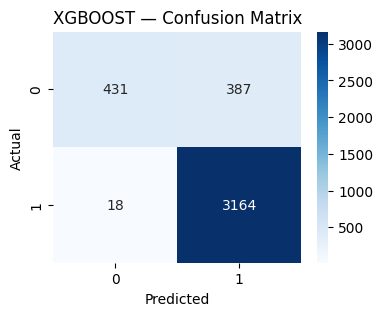


 RANDOM_FOREST — Classification Report

              precision    recall  f1-score   support

           0       0.94      0.53      0.68       818
           1       0.89      0.99      0.94      3182

    accuracy                           0.90      4000
   macro avg       0.92      0.76      0.81      4000
weighted avg       0.90      0.90      0.88      4000



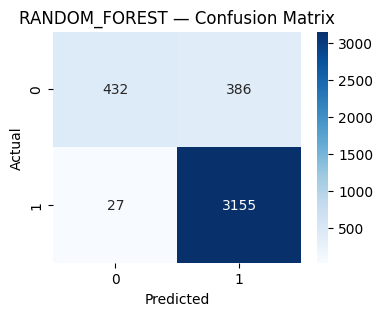


 LIGHTGBM — Classification Report

              precision    recall  f1-score   support

           0       0.96      0.53      0.69       818
           1       0.89      0.99      0.94      3182

    accuracy                           0.90      4000
   macro avg       0.93      0.76      0.81      4000
weighted avg       0.91      0.90      0.89      4000



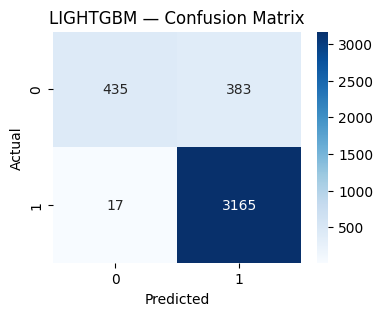

In [45]:
show_report("xgboost", best_models['xgboost'], X_test, y_test)
show_report("random_forest", best_models['random_forest'], X_test, y_test)
show_report("lightgbm", best_models['lightgbm'], X_test, y_test)